# UBER RIDE DATASET CLEANING by Deborah Okoroh David

I will prepare this raw Uber ride dataset for analysis through comprehensive cleaning and transformation before analysis. 

In [111]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Data import
df = pd.read_csv('uber_dirty_nigeria.csv')

# DATA EXPLORATION

In [102]:
# Preview dataset
df.head()

,Trip_ID,Date,Pickup_Location,Dropoff_Location,Driver_ID,Passenger_ID,Distance_km,Duration_min,Fare_amount,Payment_Method,Rating
0,T1000,1/13/2023,Kno,Victoria Island,D22,P33,22.39,141,13785.75,cash,NaN
1,T1001,4/25/2023,Abja,V.I,D135,P406,53.49,28,12534.59,Transfer,4.0
2,T1002,12/13/2023,Abja,Garkii,D182,P277,46.05,0,12905.84,cash,5.0
3,T1003,2/14/2023,Lagoss,Ikeja,D99,P330,42.88,169,16461.73,CARD,NaN
4,T1004,1/16/2023,Port-Harcourt,Garkii,D187,P158,121.26,101,3830.12,cash,4.0


In [10]:
# See size of dataset
df.shape

(1030, 11)

In [12]:
# See datatypes to knw which one to correct
df.dtypes

Trip_ID              object
Date                 object
Pickup_Location      object
Dropoff_Location     object
Driver_ID            object
Passenger_ID         object
Distance_km          object
Duration_min          int64
Fare_amount          object
Payment_Method       object
Rating              float64
dtype: object

In [14]:
# Find number of null values in each column
df.isnull().sum()

Trip_ID               0
Date                 46
Pickup_Location      21
Dropoff_Location      0
Driver_ID             0
Passenger_ID          0
Distance_km          28
Duration_min          0
Fare_amount          37
Payment_Method      152
Rating              180
dtype: int64

In [16]:
# Count duplicates
df.duplicated().sum()

np.int64(30)

In [113]:
# Summary statistics
df.describe()

,Duration_min,Rating
count,1030.00000,850.000000
mean,43.16699,2.956471
std,56.86464,1.367376
min,0.00000,1.000000
25%,0.00000,2.000000
50%,0.00000,3.000000
75%,86.00000,4.000000
max,180.00000,5.000000


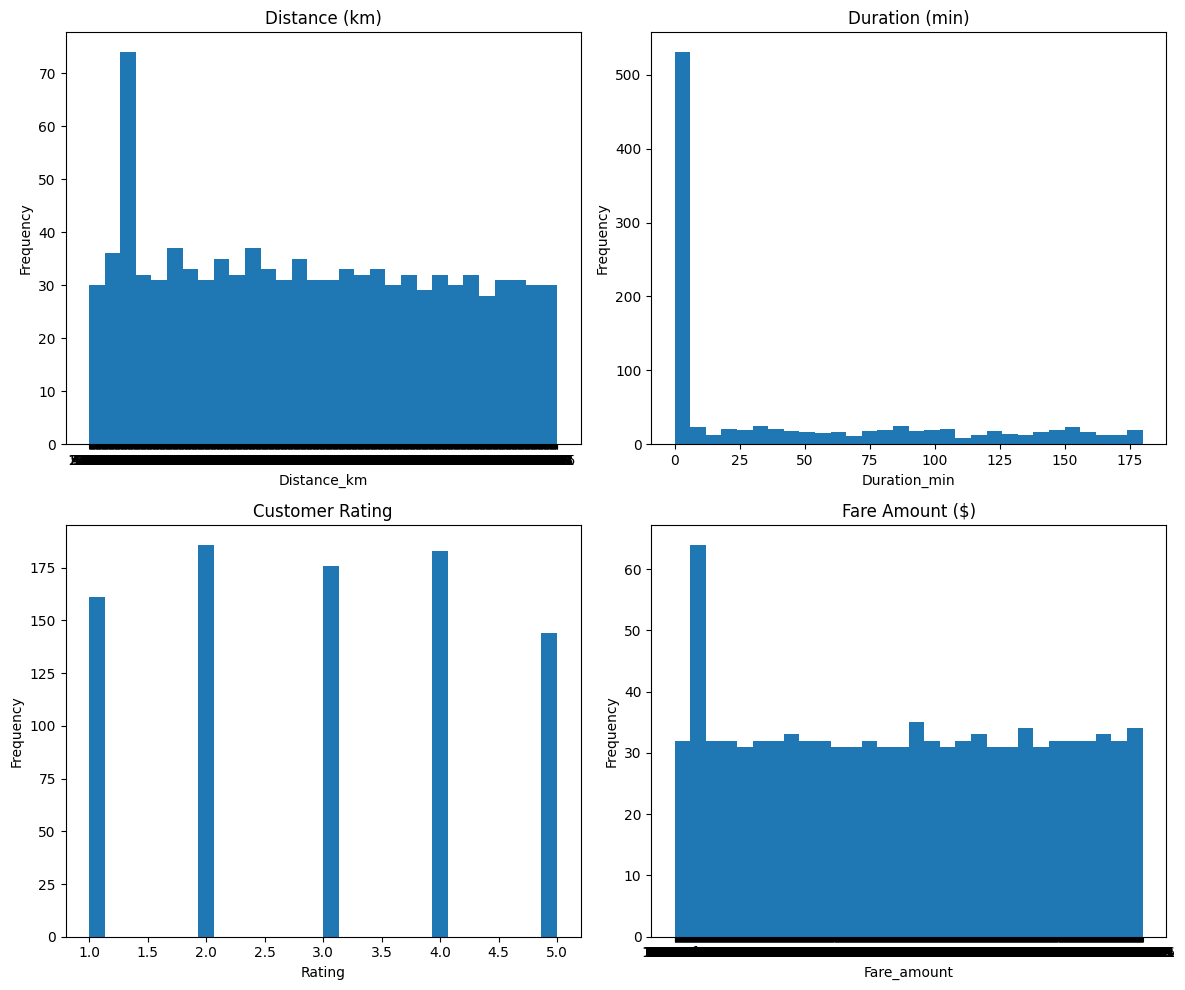

In [115]:
# Visualize numerical columns before cleaning
columns = ['Distance_km', 'Duration_min', 'Rating', 'Fare_amount']
titles = ['Distance (km)', 'Duration (min)', 'Customer Rating', 'Fare Amount ($)']

plt.figure(figsize=(12, 10))

for i, col in enumerate(columns):
    plt.subplot(2, 2, i + 1)
    plt.hist(df[col].dropna(), bins=30)
    plt.title(titles[i])
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# DATA CLEANING STEPS

In [18]:
# Duplicate dataset for cleaning
df2 = df.copy()

In [20]:
# Drop duplicates
df2.drop_duplicates(inplace=True)

DATE COLUMN CLEANING

In [22]:
mdy_date = pd.to_datetime(df2['Date'], format='%m/%d/%Y', errors='coerce') # Create different variables for different date format
dmy_date = pd.to_datetime(df2['Date'], format='%d/%m/%Y', errors='coerce')

# Fix null values and errors with both variables in a new column
df2['Clean_date'] = mdy_date.fillna(dmy_date)

# Fill remaining empty rows with mode
date_mode = df2['Clean_date'].mode()[0]
df2['Clean_date'] = df2['Clean_date'].fillna(date_mode)

# Drop original date column and rename new column
df2 = df2.drop('Date', axis=1)
df2 = df2.rename(columns={'Clean_date':'Date'})

Pickup_Location CLEANING

In [24]:
# See uniques values in column to correct misspelt and unstandardized values
df2['Pickup_Location'].unique()

array(['Kno', 'Abja', 'Lagoss', 'Port-Harcourt', 'Abuja', 'Kano',
       'Port Harcourt', 'Lagos', 'Ibadan', 'Ph', nan], dtype=object)

In [26]:
# Replace wrong values with correct ones
df2['Pickup_Location'] = df2['Pickup_Location'].replace({
    'Kno': 'Kano',
    'Abja': 'Abuja',
    'Lagoss': 'Lagos',
    'Port Harcourt': 'Port-Harcourt',
    'Ph': 'Port-Harcourt'
})

# Fill empty rows with mode
df2['Pickup_Location'] = df2['Pickup_Location'].fillna(df2['Pickup_Location'].mode()[0])

# Print values after cleaning
df2['Pickup_Location'].unique()

array(['Kano', 'Abuja', 'Lagos', 'Port-Harcourt', 'Ibadan'], dtype=object)

Dropoff_Location CLEANING

In [28]:
# See uniques values in column to correct misspelt and unstandardized values
df2['Dropoff_Location'].unique()

array(['Victoria Island', 'V.I', 'Garkii', 'Ikeja', 'Maitama', 'Leky',
       'Ajah', 'VI', 'Garki', 'Lekki'], dtype=object)

In [30]:
# Replace wrong values with correct ones
df2['Dropoff_Location'] = df2['Dropoff_Location'].replace({
    'V.I': 'Victoria Island',
    'Garkii': 'Garki',
    'Leky': 'Lekki',
    'VI': 'Victoria Island'
})

# Print values after cleaning
df2['Dropoff_Location'].unique()

array(['Victoria Island', 'Garki', 'Ikeja', 'Maitama', 'Lekki', 'Ajah'],
      dtype=object)

Distance_km CLEANING

In [32]:
df2['Distance_km'] = df2['Distance_km'].replace('ten', 10) # Replace text values with number
df2['Distance_km'] = df2['Distance_km'].fillna(df2['Distance_km'].median()) # Fill null rows with the median
df2['Distance_km'] = df2['Distance_km'].astype(float) # Change datatype from text to decimal

Duration_min CLEANING 

In [34]:
# Check number of 0 values in the duration column to understand the best filling approach
df2['Duration_min'].value_counts(ascending=False) # More than half of the duration column has 0 values. There is need for accurate duration filling

Duration_min
0      512
18       9
150      8
6        8
82       7
      ... 
171      1
163      1
72       1
112      1
108      1
Name: count, Length: 170, dtype: int64

In [61]:
avg_km_per_min = (df2.loc[df2['Duration_min'] > 0, 'Duration_min'] / df2.loc[df2['Duration_min'] > 0, 'Distance_km']).mean() # Caalculate avg km per minute
df2.loc[df2['Duration_min'] == 0, 'Duration_min'] = (df2['Distance_km'] * avg_km_per_min) # Fill 0 values in duration with distance multiplied by avg_km_per_min
df2['Duration_min'] = df2['Duration_min'].astype(int) # Fix datatype as integer (Whole number)

Fare_amount CLEANING

In [40]:
df2['Fare_amount'] = df2['Fare_amount'].replace('free', 0) # Replace free with 0
df2['Fare_amount'] = df2['Fare_amount'].astype(float) # Change datatype to decimal
df2['Fare_amount'] = df2['Fare_amount'].fillna(0) # Fill empty rows with 0 (Assumption: 'free' and empty rows did not pay for their rides)

Payment_Method CLEANING

In [42]:
# See uniques values in column to correct misspelt and unstandardized values
df2['Payment_Method'].unique()

array(['cash', 'Transfer', 'CARD', 'Card', 'Bank Transfer', 'Cash', nan],
      dtype=object)

In [44]:
df2['Payment_Method'] = df2['Payment_Method'].str.lower() # Convert all text to lower case
df2['Payment_Method'] = df2['Payment_Method'].replace('transfer', 'bank transfer').str.title() # Replace wrong value to correct one
df2['Payment_Method'] = df2['Payment_Method'].fillna(df2['Payment_Method'].mode()[0]) # Fill empty rows with mode

# Display cleaned result
df2['Payment_Method'].unique()

array(['Cash', 'Bank Transfer', 'Card'], dtype=object)

Rating column CLEANING

In [46]:
df2['Rating'] = df2['Rating'].fillna(0).astype(int) # Fill empty rows with 0 and change datatype to whole number

# POST CLEANING CHECKS

# SUMMARY STATISTICS AND VISUALIZATION

In [48]:
df2.describe()

,Distance_km,Duration_min,Fare_amount,Rating,Date
count,1000.000000,1000.000000,1000.00000,1000.000000,1000
mean,31.318250,120.314617,10046.39861,2.432000,2023-06-30 15:30:14.400000256
min,-3.520000,4.514600,0.00000,0.000000,2023-01-01 00:00:00
25%,15.255000,55.000339,4381.70250,1.000000,2023-03-27 12:00:00
50%,29.925000,111.093146,9679.57000,2.000000,2023-07-02 00:00:00
75%,45.417500,168.654298,15064.42750,4.000000,2023-10-05 00:00:00
max,148.760000,666.219065,46987.94000,5.000000,2023-12-31 00:00:00
std,19.531526,79.670604,7020.20042,1.664977,NaN


In [54]:
# I identified negative values in the distance column. I'll remove
df2 = df2[df2['Distance_km'] > 0]

In [52]:
# Rerun
df2.describe()

,Distance_km,Duration_min,Fare_amount,Rating,Date
count,998.000000,998.000000,998.000000,998.000000,998
mean,31.384890,120.276170,10008.299549,2.434870,2023-06-30 09:01:04.929859840
min,0.930000,4.514600,0.000000,0.000000,2023-01-01 00:00:00
25%,15.300000,55.000113,4375.347500,1.000000,2023-03-26 12:00:00
50%,29.925000,110.218900,9666.680000,2.000000,2023-07-02 00:00:00
75%,45.432500,168.775658,15055.575000,4.000000,2023-10-04 18:00:00
max,148.760000,666.219065,46987.940000,5.000000,2023-12-31 00:00:00
std,19.494052,79.741530,6942.209997,1.664807,NaN


In [109]:
# Closer look at numerical columns
df2[['Distance_km', 'Duration_min', 'Fare_amount', 'Rating']].describe()

,Distance_km,Duration_min,Fare_amount,Rating
count,998.000000,998.000000,998.000000,998.000000
mean,31.384890,120.013026,10008.299549,2.434870
std,19.494052,79.652082,6942.209997,1.664807
min,0.930000,4.000000,0.000000,0.000000
25%,15.300000,55.000000,4375.347500,1.000000
50%,29.925000,110.000000,9666.680000,2.000000
75%,45.432500,168.000000,15055.575000,4.000000
max,148.760000,666.000000,46987.940000,5.000000


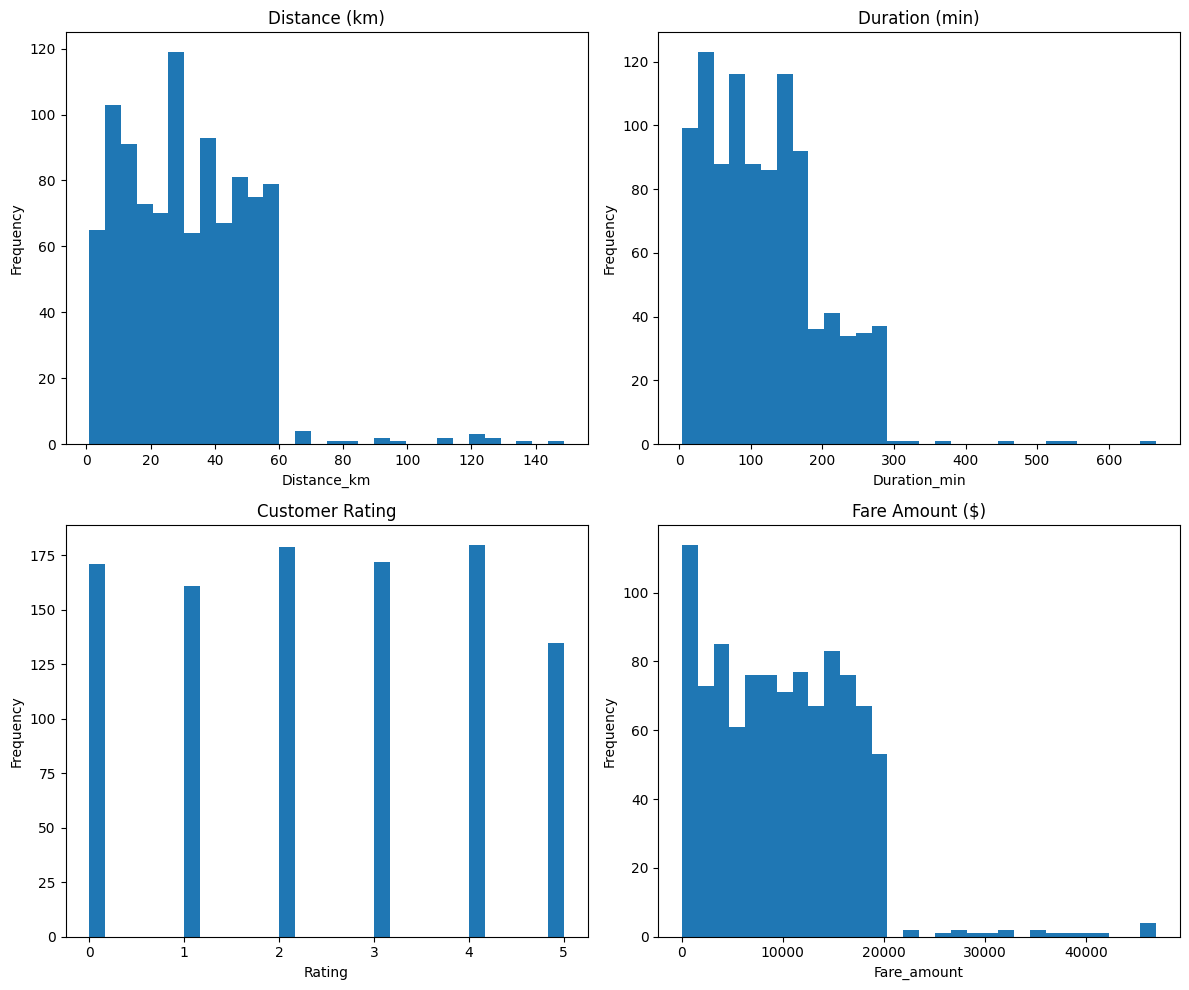

In [117]:
# Visualize numerical columns after cleaning
columns = ['Distance_km', 'Duration_min', 'Rating', 'Fare_amount']
titles = ['Distance (km)', 'Duration (min)', 'Customer Rating', 'Fare Amount ($)']

plt.figure(figsize=(12, 10))

for i, col in enumerate(columns):
    plt.subplot(2, 2, i + 1)
    plt.hist(df2[col].dropna(), bins=30)
    plt.title(titles[i])
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [105]:
# Preview cleaned data
df2.head(10)

,Trip_ID,Pickup_Location,Dropoff_Location,Driver_ID,Passenger_ID,Distance_km,Duration_min,Fare_amount,Payment_Method,Rating,Date
0,T1000,Kano,Victoria Island,D22,P33,22.39,141,13785.75,Cash,0,2023-01-13
1,T1001,Abuja,Victoria Island,D135,P406,53.49,28,12534.59,Bank Transfer,4,2023-04-25
2,T1002,Abuja,Garki,D182,P277,46.05,223,12905.84,Cash,5,2023-12-13
3,T1003,Lagos,Ikeja,D99,P330,42.88,169,16461.73,Card,0,2023-02-14
4,T1004,Port-Harcourt,Garki,D187,P158,121.26,101,3830.12,Cash,4,2023-01-16
5,T1005,Abuja,Ikeja,D131,P256,41.96,172,11160.28,Cash,3,2023-09-16
6,T1006,Kano,Garki,D157,P274,19.14,92,6155.71,Cash,0,2023-01-27
7,T1007,Lagos,Maitama,D41,P495,58.89,285,19202.28,Bank Transfer,5,2023-11-29
8,T1008,Kano,Lekki,D97,P428,46.02,223,13520.14,Card,4,2023-04-23
9,T1009,Abuja,Ikeja,D141,P416,2.11,10,14104.23,Bank Transfer,4,2023-01-04


In [77]:
# Number of cleaned rows and columns
print('Number of cleaned rows and columns is', df2.shape)


Number of cleaned rows and columns is (998, 11)


In [79]:
# Percentage of removed data
original_dataset = len(df)
cleaned_dataset = len(df2)

removed_rows = ((original_dataset - cleaned_dataset) / original_dataset) * 100

print(f'Percentage of data removed is {removed_rows:.2f}%')

Percentage of data removed is 3.11%


In [81]:
df2.dtypes

Trip_ID                     object
Pickup_Location             object
Dropoff_Location            object
Driver_ID                   object
Passenger_ID                object
Distance_km                float64
Duration_min                 int64
Fare_amount                float64
Payment_Method              object
Rating                       int64
Date                datetime64[ns]
dtype: object

In [83]:
df2.isnull().sum()

Trip_ID             0
Pickup_Location     0
Dropoff_Location    0
Driver_ID           0
Passenger_ID        0
Distance_km         0
Duration_min        0
Fare_amount         0
Payment_Method      0
Rating              0
Date                0
dtype: int64

In [91]:
# Check duplicates
df2.duplicated().sum()

np.int64(0)

Data is fully cleaned with minimal data loss and is ready for analysis

# EXPORT DATA

In [96]:
# Data export
df2.to_excel('Cleaned_Uber_Dataset.xlsx', index=False)

Contact me: deborahokorohdavid@gmail.com